In [36]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Alfred Hitchcock once said: “The length of a film should be directly related to the endurance of the human bladder.”

In [2]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title = imdb_title_basics_df
# imdb = imdb_title
q_4_Imdb = imdb_title["runtime_minutes"].value_counts().quantile(1)
q_3_Imdb = imdb_title["runtime_minutes"].value_counts().quantile(.75)
q_2_Imdb = imdb_title["runtime_minutes"].value_counts().quantile(.5)
q_1_Imdb = imdb_title_basics_df["runtime_minutes"].value_counts().quantile(.25)

q_1_Imdb , q_2_Imdb , q_3_Imdb, q_4_Imdb
imdb_title.info()
#Initial attempt to get the range of the occurances using quartile range in the value_counts
#shows broad range, shouldn't look at any below q_3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [3]:
imdb_title2 = imdb_title.drop_duplicates(subset=['original_title'], keep = 'first')
imdb_title2 = imdb_title.drop_duplicates(subset=['primary_title'], keep = 'first')
imdb_title2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136071 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           136071 non-null  object 
 1   primary_title    136071 non-null  object 
 2   original_title   136055 non-null  object 
 3   start_year       136071 non-null  int64  
 4   runtime_minutes  106598 non-null  float64
 5   genres           131180 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ MB


In [4]:
imdb_title2.dropna(subset = ['start_year'],axis = 0,  inplace = True)
imdb_title2.dropna(subset = ['runtime_minutes'], axis = 0,  inplace = True)
imdb_title2.drop(['primary_title'], axis =1 , inplace = True)
imdb_title2.drop(['original_title'], axis = 1,  inplace = True)
imdb_title2.drop(['genres'], axis = 1,  inplace = True)

imdb_title2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106598 entries, 0 to 146142
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           106598 non-null  object 
 1   start_year       106598 non-null  int64  
 2   runtime_minutes  106598 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


<ipython-input-4-068b64d530f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_title2.dropna(subset = ['start_year'],axis = 0,  inplace = True)
<ipython-input-4-068b64d530f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_title2.dropna(subset = ['runtime_minutes'], axis = 0,  inplace = True)
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re

In [5]:
most_common = imdb_title2["runtime_minutes"].value_counts().index[0]
most_common

90.0

In [6]:
#Show where the longer times are moving more towards
G_90_Imdb = imdb_title2.loc[(imdb_title2['runtime_minutes'] > 90), ['start_year']].mean()
B_90_Imdb = imdb_title2.loc[(imdb_title2['runtime_minutes'] < 90), ['start_year']].mean()
Is_90_Imdb = imdb_title2.loc[(imdb_title2['runtime_minutes'] == 90), ['start_year']].mean()
G_90_Imdb, B_90_Imdb, Is_90_Imdb 
# Shows newer movies are tending to be longer than 90 minutes with showing the average year psuhing to be higher when looking at longer runtimes

(start_year    2014.462165
 dtype: float64,
 start_year    2014.233998
 dtype: float64,
 start_year    2014.39813
 dtype: float64)

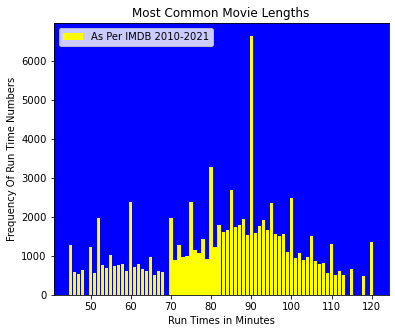

In [7]:
IMDB_Runtime_Numbers = imdb_title2['runtime_minutes'].value_counts().nlargest(70)

IMDB_Runtime_Numbers_Index = imdb_title2['runtime_minutes'].value_counts().index[0:70]
fig_IMBD, ax =plt.subplots(figsize = (6,5))
ax.bar(IMDB_Runtime_Numbers_Index ,IMDB_Runtime_Numbers , color = 'yellow' )
ax.set_facecolor('blue')
ax.set_ylabel("Frequency Of Run Time Numbers")
ax.set_title("Most Common Movie Lengths")
ax.set_xlabel("Run Times in Minutes")
ax.legend(['As Per IMDB 2010-2021'])

In [8]:
#Graph that shows frequncy of runtimes
# Pushing towards

In [9]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie = rt_movie_info_df
# rt = rt_movie

# new data frame to work on

In [10]:
rt_movie['runtime_minutes']=rt_movie['runtime'].str.split()
rt_movie['runtime_minutes']=rt_movie['runtime_minutes'].str[0]
rt_movie['runtime_minutes'] = rt_movie['runtime_minutes'].astype(float)
# change runtime from a string to a solo float number

In [11]:
# Grabbing just the year from theater date
rt_movie['start_year']=rt_movie['theater_date'].str.split()
rt_movie['start_year']=rt_movie['start_year'].str[2]
rt_movie['start_year'] = (rt_movie['start_year']).astype(float)


In [12]:
rt_movie.dropna(axis = 0, subset = ['start_year'], inplace = True)
rt_movie.dropna(axis = 0, subset = ['runtime_minutes'], inplace = True)
# Removing any null values in the columns 'Year' and 'running_mins'

In [13]:
# Seeing if the standard feature time of 90 is more towards current movies 
rt_movie.loc[(rt_movie['runtime_minutes'] ==90), ['start_year']].mean()
# Average year being 1987 can possibly show

start_year    1986.807692
dtype: float64

In [14]:
# Dropping unnecessary columns
rt_movie.drop(['runtime'], axis =1, inplace =True)
rt_movie.drop(['studio'],axis = 1, inplace = True)
rt_movie.drop(['currency'],axis = 1, inplace = True)
rt_movie.drop(['writer'],axis = 1, inplace = True)

,id,synopsis,rating,genre,director,theater_date,dvd_date,box_office,runtime_minutes,start_year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,"Oct 9, 1971","Sep 25, 2001",NaN,104.0,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","Jan 1, 2013","600,000",108.0,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,116.0,1996.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,"Dec 9, 1994","Aug 27, 1997",NaN,128.0,1994.0
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,"Mar 3, 2000","Jul 11, 2000",NaN,95.0,2000.0


In [15]:
#checking normal runtimes for newer movies
print(rt_movie.loc[(rt_movie['start_year'] >=2015),['runtime_minutes']].mean())
print(rt_movie.loc[(rt_movie['start_year'] >=2015),['runtime_minutes']].max())
print(rt_movie.loc[(rt_movie['start_year'] >=2015),['runtime_minutes']].min())
# rt_movie.loc[(rt_movie['Year'] >=2015),['running_mins']]
#Ave 16 mins longer than mode of data set
# Max length 148 min
# Min legnth 80
#Showing More Modern Movies are longer than the feature length Standard
# Modern movies being greater in this case being 2015 and present 

runtime_minutes    106.461538
dtype: float64
runtime_minutes    148.0
dtype: float64
runtime_minutes    80.0
dtype: float64


In [16]:
#function to do what was above, just grabbing the float number from the string
def string_to_float(df, series):
    df[series] = df[series].str.split()
    df[series] = df[series].str[0]
    df[series] = df[series].astype(float)
    return df[series]
    

In [17]:
q_4_rt = rt_movie["runtime_minutes"].value_counts().quantile(1)
q_3_rt = rt_movie["runtime_minutes"].value_counts().quantile(.75)
q_2_rt = rt_movie["runtime_minutes"].value_counts().quantile(.5)
q_1_rt = rt_movie["runtime_minutes"].value_counts().quantile(.25)
q_1_rt , q_2_rt, q_3_rt, q_4_rt
# shows broad range and may want to ignore anything below q_3

(1.25, 3.0, 18.0, 53.0)

In [18]:
Top_50_RT_Indexes = rt_movie['runtime_minutes'].value_counts().index[:50]
Top_50_RT = rt_movie['runtime_minutes'].value_counts().nlargest(50)
#grabbbing 100 most common runtimes from rotten tomatoes file 

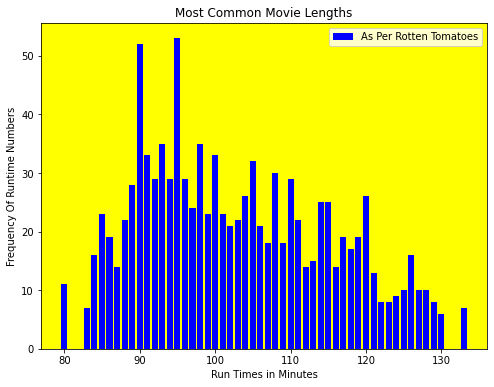

In [27]:
fig_rt , ax = plt.subplots(figsize = (8,6))
ax.bar(Top_50_RT_Indexes , Top_50_RT, color = 'blue' )
ax.set_ylabel("Frequency Of Runtime Numbers")
ax.set_xlabel("Run Times in Minutes")
ax.set_title('Most Common Movie Lengths')
ax.set_facecolor('yellow')
ax.legend(['As Per Rotten Tomatoes'])
# plot showing top 50 most common runtimes
#hist later

In [20]:
# Gathering Values within Rotten Tomatoes File Where only looking at frequncy runtime within the past 10 years
P10_Years_RT = rt_movie.loc[(rt_movie['start_year'] >=2011),['runtime_minutes']].value_counts().nlargest(50)
ten = P10_Years_RT.index[0:50]
# way to turn multi-index into float values for the x column
P10_Index = ten.get_level_values(0).astype(float)

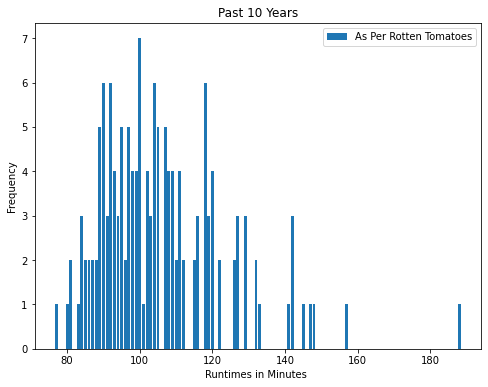

In [21]:
# Graph shoiwing most frequent runtimes of the past 10 years rotten tomatoes graph
fig_Rotten_Modern , ax= plt.subplots(figsize = (8,6))
ax.bar(P10_Index, P10_Years_RT)
ax.set_xlabel('Runtimes in Minutes ')
ax.set_ylabel('Frequency')
ax.set_title('Past 10 Years')
ax.legend(['As Per Rotten Tomatoes'])

In [22]:
# top most 5 or 10 common of each decade put in a list or dictionary key, year ,value most common runtime put in line chart?
mode_1 = rt_movie.loc[rt_movie['start_year'] < 1941, ['runtime_minutes']].mode()
mode_2 = rt_movie.loc[(rt_movie['start_year'] >= 1941) & (rt_movie['start_year'] <1961), ['runtime_minutes']].mode()
mode_3 = rt_movie.loc[(rt_movie['start_year'] >= 1961) & (rt_movie['start_year'] <1981), ['runtime_minutes']].mode()
mode_4 = rt_movie.loc[(rt_movie['start_year'] >= 1981) & (rt_movie['start_year'] <2001), ['runtime_minutes']].mode()
mode_5 = rt_movie.loc[(rt_movie['start_year'] >= 2001) & (rt_movie['start_year'] <2011), ['runtime_minutes']].mode()
mode_6 = rt_movie.loc[(rt_movie['start_year'] >= 2011) , ['runtime_minutes']].mode()
mode_7 = rt_movie.loc[(rt_movie['start_year'] == 2018) , ['runtime_minutes']].mode()
median_1 = rt_movie.loc[rt_movie['start_year'] < 1941, ['runtime_minutes']].median()
median_2 = rt_movie.loc[(rt_movie['start_year'] >= 1941) & (rt_movie['start_year'] <1961), ['runtime_minutes']].median()
median_3 = rt_movie.loc[(rt_movie['start_year'] >= 1961) & (rt_movie['start_year'] <1981), ['runtime_minutes']].median()
median_4 = rt_movie.loc[(rt_movie['start_year'] >= 1981) & (rt_movie['start_year'] <2001), ['runtime_minutes']].median()
median_5 = rt_movie.loc[(rt_movie['start_year'] >= 2001) & (rt_movie['start_year'] <2011), ['runtime_minutes']].median()
median_6 = rt_movie.loc[(rt_movie['start_year'] >= 2011) , ['runtime_minutes']].median()
median_7 = rt_movie.loc[(rt_movie['start_year'] == 2018) , ['runtime_minutes']].median()
mean_1 = rt_movie.loc[rt_movie['start_year'] < 1941, ['runtime_minutes']].mean()
mean_2 = rt_movie.loc[(rt_movie['start_year'] >= 1941) & (rt_movie['start_year'] <1961), ['runtime_minutes']].mean()
mean_3 = rt_movie.loc[(rt_movie['start_year'] >= 1961) & (rt_movie['start_year'] <1981), ['runtime_minutes']].mean()
mean_4 = rt_movie.loc[(rt_movie['start_year'] >= 1981) & (rt_movie['start_year'] <2001), ['runtime_minutes']].mean()
mean_5 = rt_movie.loc[(rt_movie['start_year'] >= 2001) & (rt_movie['start_year'] <2011), ['runtime_minutes']].mean()
mean_6 = rt_movie.loc[(rt_movie['start_year'] >= 2011) , ['runtime_minutes']].mean()
mean_7 = rt_movie.loc[(rt_movie['start_year'] == 2018) , ['runtime_minutes']].mean()
print(mode_1, mode_2, mode_3, mode_4, mode_5, mode_6, mode_7)
print(mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7)
print(median_1, median_2, median_3, median_4, median_5, median_6, median_7)
#modes being in order   80, 90 , 95, 95, 102, 100, 105 with mode_5 and mode_7 having multiple modes therefore took the avergae of them
#medians being 

   runtime_minutes
0             80.0    runtime_minutes
0             90.0    runtime_minutes
0             95.0    runtime_minutes
0             95.0    runtime_minutes
0             93.0
1             95.0
2            108.0
3            115.0    runtime_minutes
0            100.0    runtime_minutes
0             90.0
1            120.0
runtime_minutes    99.833333
dtype: float64 runtime_minutes    102.362637
dtype: float64 runtime_minutes    110.300699
dtype: float64 runtime_minutes    106.526316
dtype: float64 runtime_minutes    104.058065
dtype: float64 runtime_minutes    107.195122
dtype: float64 runtime_minutes    110.4
dtype: float64
runtime_minutes    93.5
dtype: float64 runtime_minutes    98.0
dtype: float64 runtime_minutes    104.0
dtype: float64 runtime_minutes    102.5
dtype: float64 runtime_minutes    102.0
dtype: float64 runtime_minutes    104.0
dtype: float64 runtime_minutes    106.5
dtype: float64


C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

Text(0.5, 1.0, 'The Gradual Increase Of Movie Runtimes Through History ')

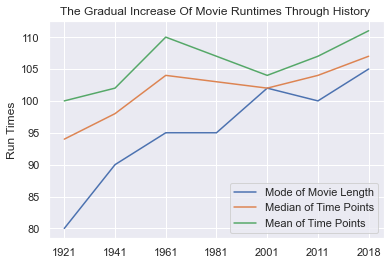

In [39]:
mode_values = [80, 90, 95, 95, 102, 100, 105]
Time = ['1921', '1941', '1961', '1981', '2001', '2011', '2018' ]
median_values = [94,98,104,103,102,104,107]
mean_values = [100, 102, 110, 107, 104, 107, 111]
sns.set_theme(style="darkgrid")
sns.lineplot(Time, mode_values)
sns.set_theme(style="darkgrid")
sns.lineplot(Time, median_values)
sns.lineplot(Time, mean_values)
plt.legend(['Mode of Movie Length', 'Median of Time Points' , 'Mean of Time Points'])
plt.ylabel('Run Times')
plt.title('The Gradual Increase Of Movie Runtimes Through History ')
#Line graph to show non-technical viewer that trend for movie lengths is getting longer since 1921